In [1]:
import numpy as np
from pathlib import Path 
import matplotlib.pyplot as plt
import os
import pandas as pd
import pandas as pd
import numpy as np
from mediapipe.python.solutions import holistic as mp_holistic


#input
datainputfolder = './data_input/'
dataoutputfolder = './data_output/'
datafols = os.listdir(datainputfolder)

NameError: name 'mediapipe_3d_frame_trackedPoint_xyz' is not defined

In [103]:
#version 2: most of this code is from https://github.com/freemocap/freemocap/blob/jon/npy_to_csv_ipynb/ipython_jupyter_notebooks/export_freemocap_npy_as_pandas_data_frame_csv.ipynb
for fil in datafols:
    #for testing
    for f in ['_smoothed', '']:
        nam = fil+f
        mediapipe_3d_npy_path = datainputfolder+fil +'/DataArrays/mediaPipeSkel_3d' + f + '.npy'
        mediapipe_3d_frame_trackedPoint_xyz = np.load(str(mediapipe_3d_npy_path))
        #set up names etc
                  #setting up mediapipe names and legnth
        pose_landmark_names = [landmark.name.lower() for landmark in mp_holistic.PoseLandmark]
        hand_landmark_names = [landmark.name.lower() for landmark in mp_holistic.HandLandmark]

        number_of_body_points = len(pose_landmark_names)
        number_of_hand_points = len(hand_landmark_names)

        first_body_marker_index = 0
        last_body_marker_index = number_of_body_points-1

        first_right_hand_marker_index = last_body_marker_index + 1
        last_right_hand_marker_index = number_of_body_points + number_of_hand_points-1

        first_left_hand_marker_index = last_right_hand_marker_index + 1
        last_left_hand_marker_index = last_right_hand_marker_index+1 + number_of_hand_points-1

        first_face_marker_index = last_left_hand_marker_index + 1
        last_face_marker_index = mediapipe_3d_frame_trackedPoint_xyz.shape[1]

        number_of_face_points = last_face_marker_index - first_face_marker_index

        print(f"body tracked point indices: {first_body_marker_index}:{last_body_marker_index}")
        print(f"right hand tracked point indices: {first_right_hand_marker_index}:{last_right_hand_marker_index}")
        print(f"left hand tracked point indices: {first_left_hand_marker_index}:{last_left_hand_marker_index}")
        print(f"face tracked point indices: {first_face_marker_index}:{last_face_marker_index}")

        print(f"number of body points: {last_body_marker_index-first_body_marker_index+1}")
        print(f"number of right hand points: {last_right_hand_marker_index-first_right_hand_marker_index+1}")
        print(f"number of left hand points: {last_left_hand_marker_index-first_left_hand_marker_index+1}")
        print(f"number of face points: {last_face_marker_index-first_face_marker_index+1}")
        body_3d_xyz = mediapipe_3d_frame_trackedPoint_xyz[:,first_body_marker_index:last_body_marker_index+1,:]
        right_hand_3d_xyz = mediapipe_3d_frame_trackedPoint_xyz[:,first_right_hand_marker_index:last_right_hand_marker_index+1,:]
        left_hand_3d_xyz = mediapipe_3d_frame_trackedPoint_xyz[:,first_left_hand_marker_index:last_left_hand_marker_index+1,:]
        face_3d_xyz = mediapipe_3d_frame_trackedPoint_xyz[:,first_face_marker_index:last_face_marker_index+1,:]
        # save broken up npy files
        np.save(dataoutputfolder+  "/dataarrays/mediapipe_body_3d_xyz.npy", body_3d_xyz)
        np.save(dataoutputfolder + "/dataarrays/mediapipe_right_hand_3d_xyz.npy", right_hand_3d_xyz)
        np.save(dataoutputfolder +"/dataarrays/mediapipe_left_hand_3d_xyz.npy", left_hand_3d_xyz)
        np.save(dataoutputfolder + "/dataarrays/mediapipe_face_3d_xyz.npy", face_3d_xyz)
        
        # create pandas data frame headers
        body_3d_xyz_header = []
        for landmark_name in pose_landmark_names:
            body_3d_xyz_header.append(f"{landmark_name}_x")
            body_3d_xyz_header.append(f"{landmark_name}_y")
            body_3d_xyz_header.append(f"{landmark_name}_z")

        right_hand_3d_xyz_header = []
        for landmark_name in hand_landmark_names:
            right_hand_3d_xyz_header.append(f"right_hand_{landmark_name}_x")
            right_hand_3d_xyz_header.append(f"right_hand_{landmark_name}_y")
            right_hand_3d_xyz_header.append(f"right_hand_{landmark_name}_z")

        left_hand_3d_xyz_header = []
        for landmark_name in hand_landmark_names:
            left_hand_3d_xyz_header.append(f"left_hand_{landmark_name}_x")
            left_hand_3d_xyz_header.append(f"left_hand_{landmark_name}_y")
            left_hand_3d_xyz_header.append(f"left_hand_{landmark_name}_z")

        face_3d_xyz_header = []
        for landmark_number in range(last_face_marker_index - first_face_marker_index):
            face_3d_xyz_header.append(f"face_{str(landmark_number).zfill(4)}_x")
            face_3d_xyz_header.append(f"face_{str(landmark_number).zfill(4)}_y")
            face_3d_xyz_header.append(f"face_{str(landmark_number).zfill(4)}_z")
            
        print(f"body 3d xyz shape: {body_3d_xyz.shape}")
        print(f"right hand 3d xyz shape: {right_hand_3d_xyz.shape}")
        print(f"left hand 3d xyz shape: {left_hand_3d_xyz.shape}")
        print(f"face 3d xyz shape: {face_3d_xyz.shape}")

        number_of_frames = mediapipe_3d_frame_trackedPoint_xyz.shape[0]
        body_flat = body_3d_xyz.reshape(number_of_frames, number_of_body_points*3)
        body_flat.shape

        body_dataframe = pd.DataFrame(body_flat, columns=body_3d_xyz_header)
        body_dataframe.to_csv(dataoutputfolder+ nam+ "mediapipe_body_3d_xyz.csv", index=False)

        right_hand_flat = right_hand_3d_xyz.reshape(number_of_frames, number_of_hand_points*3)
        right_hand_dataframe = pd.DataFrame(right_hand_flat, columns=right_hand_3d_xyz_header)
        right_hand_dataframe.to_csv(dataoutputfolder+ nam+ "mediapipe_right_hand_3d_xyz.csv", index=False)

        left_hand_flat = left_hand_3d_xyz.reshape(number_of_frames, number_of_hand_points*3)
        left_hand_dataframe = pd.DataFrame(left_hand_flat, columns=left_hand_3d_xyz_header)
        left_hand_dataframe.to_csv(dataoutputfolder+ nam+ "mediapipe_left_hand_3d_xyz.csv", index=False)

        face_flat = face_3d_xyz.reshape(number_of_frames, number_of_face_points*3)
        face_dataframe = pd.DataFrame(face_flat, columns=face_3d_xyz_header)
        face_dataframe.to_csv(dataoutputfolder+ nam+ "mediapipe_face_3d_xyz.csv", index=False)


body tracked point indices: 0:32
right hand tracked point indices: 33:53
left hand tracked point indices: 54:74
face tracked point indices: 75:543
number of body points: 33
number of right hand points: 21
number of left hand points: 21
number of face points: 469
body 3d xyz shape: (541, 33, 3)
right hand 3d xyz shape: (541, 21, 3)
left hand 3d xyz shape: (541, 21, 3)
face 3d xyz shape: (541, 468, 3)
body tracked point indices: 0:32
right hand tracked point indices: 33:53
left hand tracked point indices: 54:74
face tracked point indices: 75:543
number of body points: 33
number of right hand points: 21
number of left hand points: 21
number of face points: 469
body 3d xyz shape: (541, 33, 3)
right hand 3d xyz shape: (541, 21, 3)
left hand 3d xyz shape: (541, 21, 3)
face 3d xyz shape: (541, 468, 3)
body tracked point indices: 0:32
right hand tracked point indices: 33:53
left hand tracked point indices: 54:74
face tracked point indices: 75:543
number of body points: 33
number of right hand 

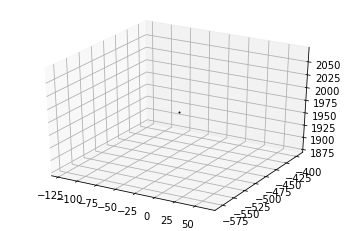

In [73]:
#skel_fr_mar_dim = np.load(dats) 

#sk_x = skel_fr_mar_dim[200, :, 0]  # skeleton x data
#sk_y = skel_fr_mar_dim[200, :, 1]  # skeleton y data
#sk_z = skel_fr_mar_dim[200, :, 2]  # skeleton z data
#
#fig = plt.figure()
#ax = plt.axes(projection = '3d')
#ax.scatter3D(sk_x, sk_y, sk_z, marker=".", color="k", s=4.0)
#
#
#mx = np.nanmean(sk_x)
#my = np.nanmean(sk_y)
#mz = np.nanmean(sk_z)
#
#axRange = 100
#
#ax.set_xlim(mx - axRange, mx + axRange)
#ax.set_ylim(my - axRange, my + axRange)
#ax.set_zlim(mz - axRange, mz + axRange)
#plt.show()